In [2]:
# Task 1: Exploratory Data Analysis (EDA)
# 1. Load Dataset and Explore
import pandas as pd

df = pd.read_csv('wine.csv')  # replace with your file
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())


   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           No

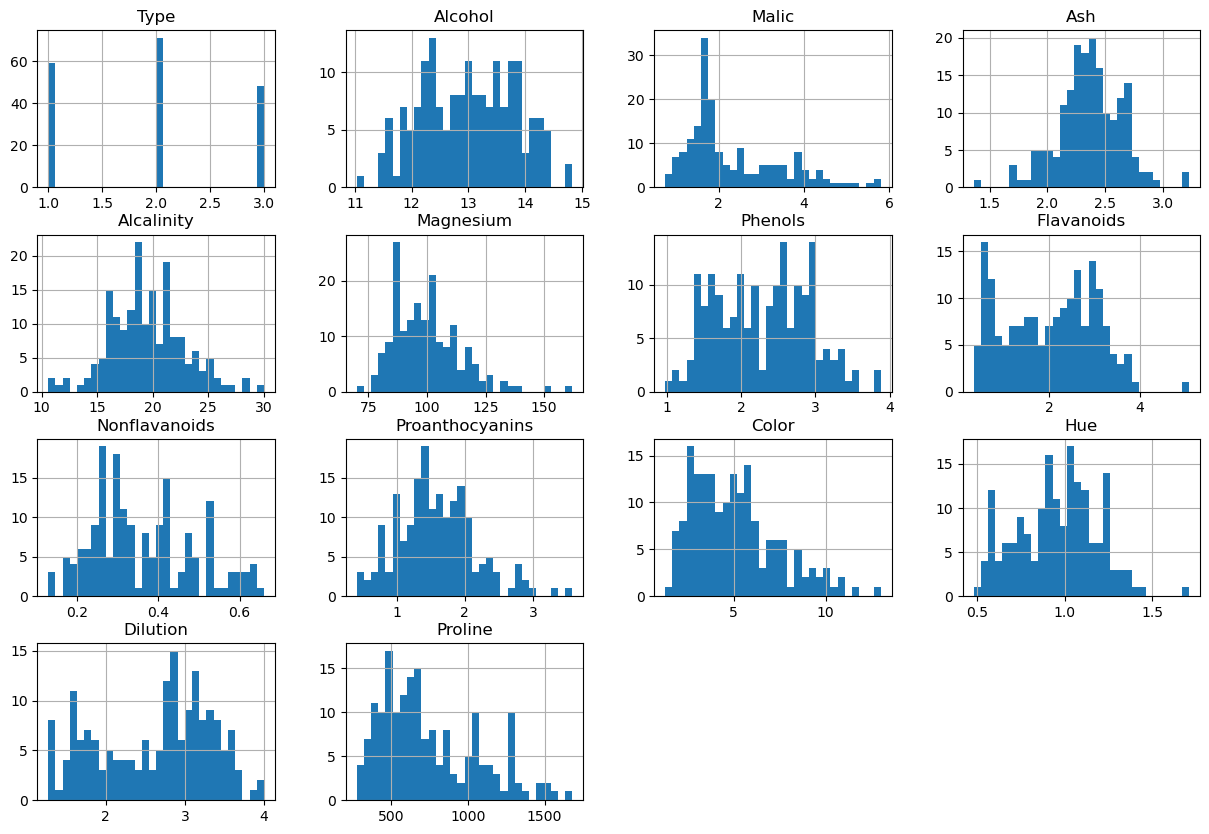

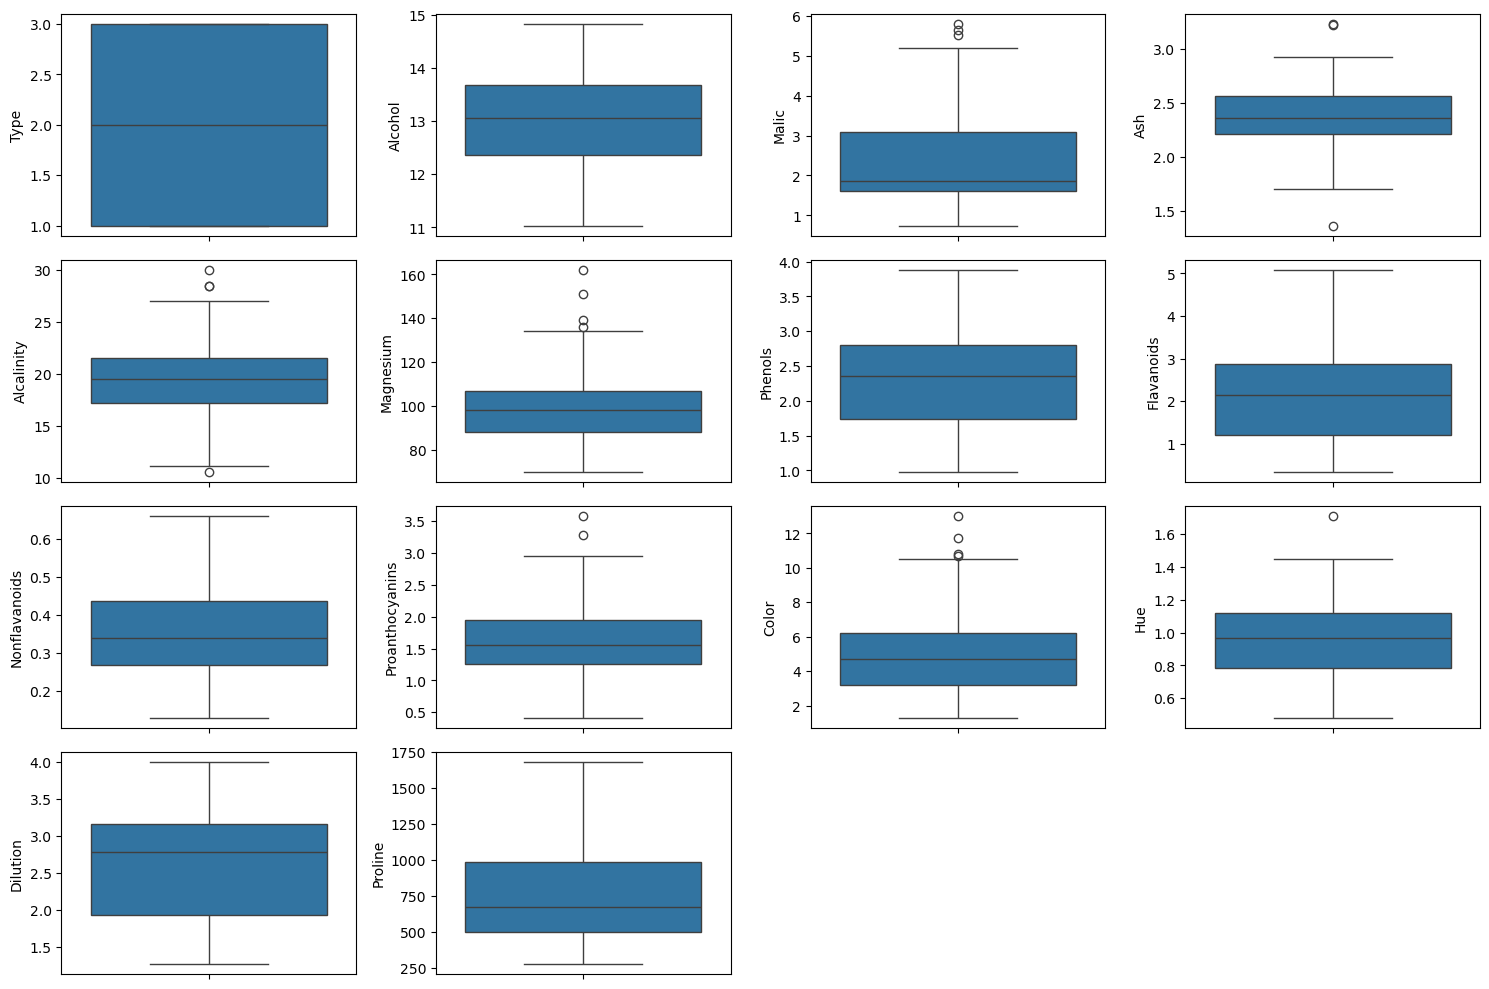

In [3]:
#2. Feature Distributions
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms
df.hist(bins=30, figsize=(15, 10))
plt.show()

# Boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col])
plt.tight_layout()
plt.show()


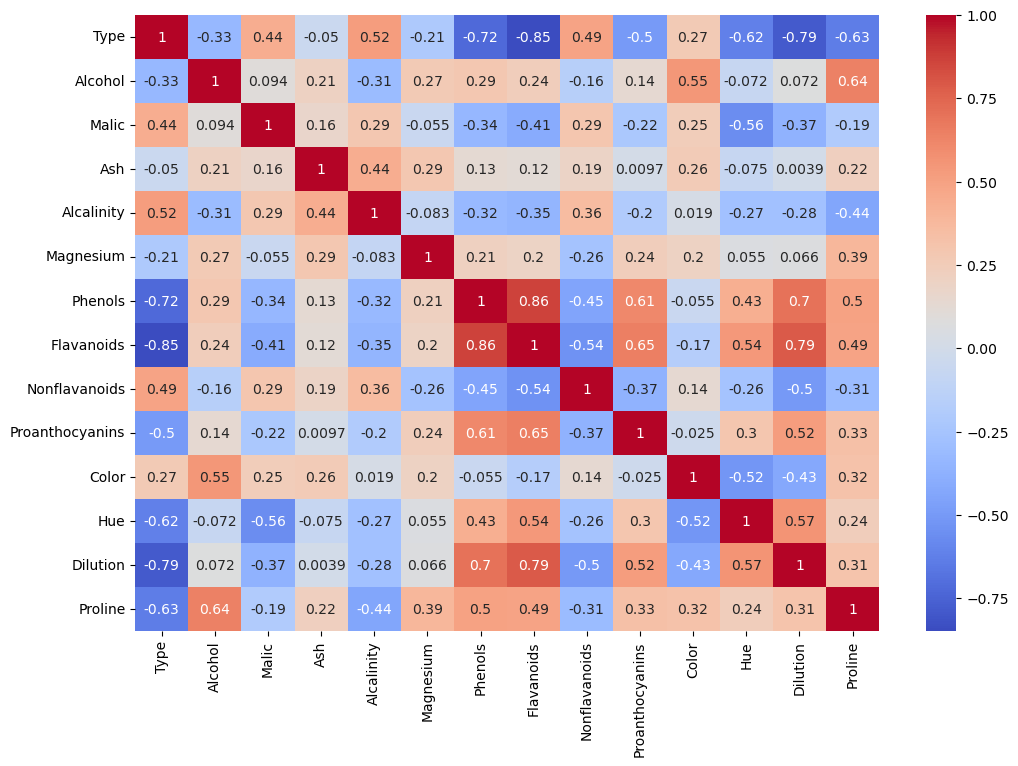

In [4]:
# 3. Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [5]:
#Task 2: Dimensionality Reduction with PCA
#1. Standardize Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.select_dtypes(include='number'))


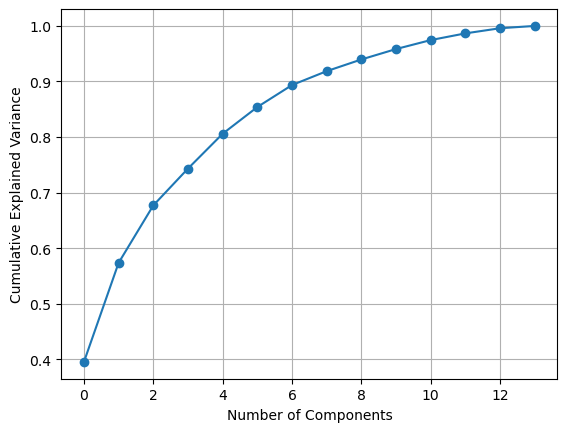

In [6]:
#2. Apply PCA & Determine Optimal Components
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scree Plot
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [7]:
#3. Transform Data
pca = PCA(n_components=2)  # adjust based on explained variance
X_reduced = pca.fit_transform(X_scaled)



In [8]:
#Task 3: Clustering on Original Data
#1. K-Means Clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
labels_original = kmeans.fit_predict(X_scaled)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


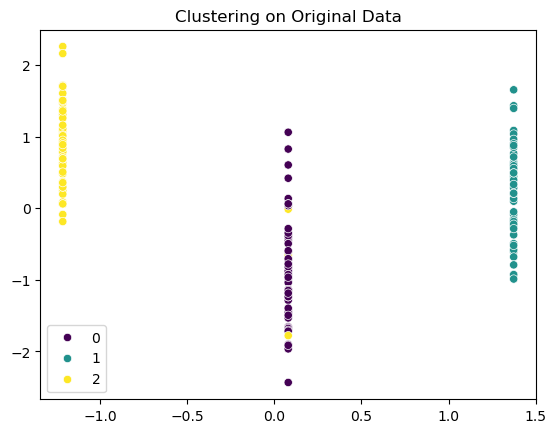

In [9]:
#2. Visualize Clusters
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels_original, palette='viridis')
plt.title("Clustering on Original Data")
plt.show()



In [10]:
#3. Evaluate Clustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

print("Silhouette Score:", silhouette_score(X_scaled, labels_original))
print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, labels_original))


Silhouette Score: 0.30648398324833453
Davies-Bouldin Index: 1.315707552261773


In [11]:
# Task 4: Clustering on PCA Data
#1. Apply K-Means to PCA Data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_reduced)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


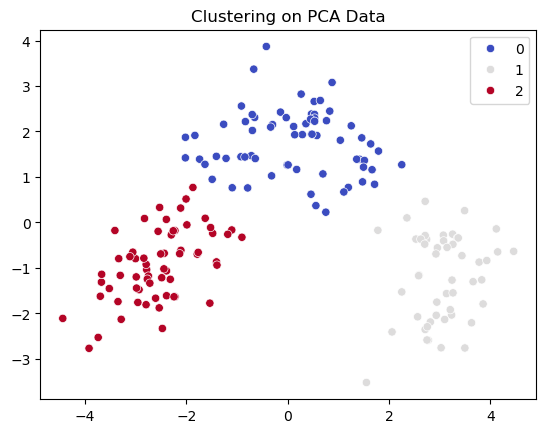

In [12]:
# 2. Visualize PCA Clusters
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=labels_pca, palette='coolwarm')
plt.title("Clustering on PCA Data")
plt.show()



In [13]:
#3. Evaluate Clustering
print("Silhouette Score (PCA):", silhouette_score(X_reduced, labels_pca))
print("Davies-Bouldin Index (PCA):", davies_bouldin_score(X_reduced, labels_pca))


Silhouette Score (PCA): 0.6024415520362844
Davies-Bouldin Index (PCA): 0.5397078562575711


In [ ]:
Task 5: Conclusion and Insights
Key Findings
Did PCA improve clustering performance?

Were clusters more distinguishable?

Practical Implications
PCA helps with high-dimensional, noisy data.

Use PCA when dimensionality reduction leads to better performance or visualization.

Recommendations
Use PCA if interpretability and performance gain is observed.

For small, simple datasets, clustering without PCA may suffice.